# Exploring Pen vs Tissue Patches
1. visulaize
2. Histograms

In [1]:
import pandas as pd
from pathlib import Path
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# GLOBALS
DATA_DIR = Path.cwd().parent/'data'

### Visualize

In [3]:
filenames = [i for i in (DATA_DIR/'all').rglob('*.png')]
tissue_names = [file for file in filenames if file.parent.name == 'keep']
pen_names = [file for file in filenames if file.parent.name == 'pen-fold']

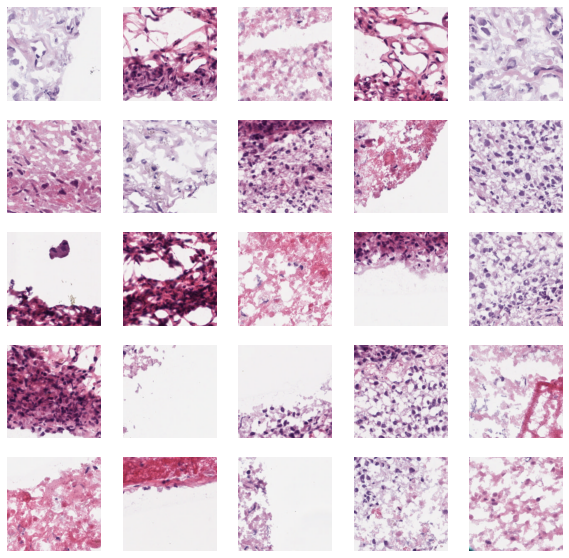

In [4]:
fig, ax = plt.subplots(5,5, figsize=(10,10))
for i in range(5):
    for j in range(5):
        I = io.imread(tissue_names[5*i+j])
        ax[i][j].imshow(I)
        ax[i][j].axis('off')
plt.show()

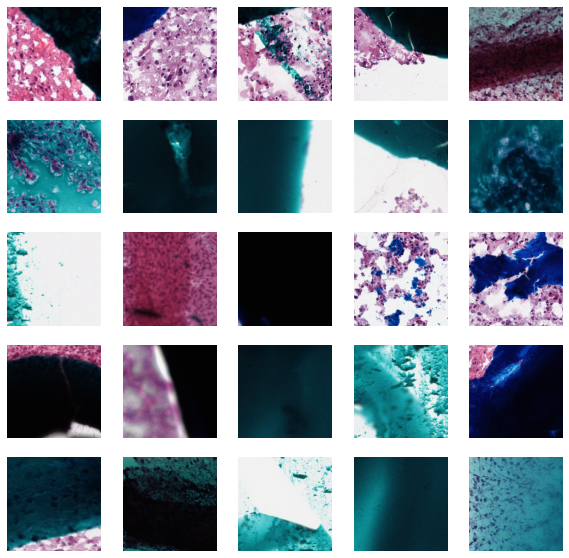

In [5]:
fig, ax = plt.subplots(5,5, figsize=(10,10))
for i in range(5):
    for j in range(5):
        I = io.imread(pen_names[5*i+j])
        ax[i][j].imshow(I)
        ax[i][j].axis('off')
plt.show()

### Histograms

In [6]:
def _img_to_histogram(image):
    '''Return an image histogram as concatenated 1D vector'''
    I = image.reshape([-1, 3])
    R = I[:, 0]
    G = I[:, 1]
    B = I[:, 2]
    
    bins = np.arange(0,256.0)
    hist_r, _ = np.histogram(R, bins, density=True)
    hist_g, _ = np.histogram(G, bins, density=True)
    hist_b, _ = np.histogram(B, bins, density=True)
    
    return np.concatenate([hist_r, hist_g, hist_b], axis=0)

h = _img_to_histogram(I)

In [7]:
tissue_df = pd.DataFrame([])
for i in range(10):
    I = io.imread(tissue_names[i])
    tmp = pd.DataFrame(data=_img_to_histogram(I).reshape([1,-1]), index=[tissue_names[i].name])
    tissue_df = tissue_df.append(tmp)

pen_df = pd.DataFrame([])
for i in range(10):
    I = io.imread(pen_names[i])
    tmp = pd.DataFrame(data=_img_to_histogram(I).reshape([1,-1]), index=[pen_names[i].name])
    pen_df = pen_df.append(tmp)

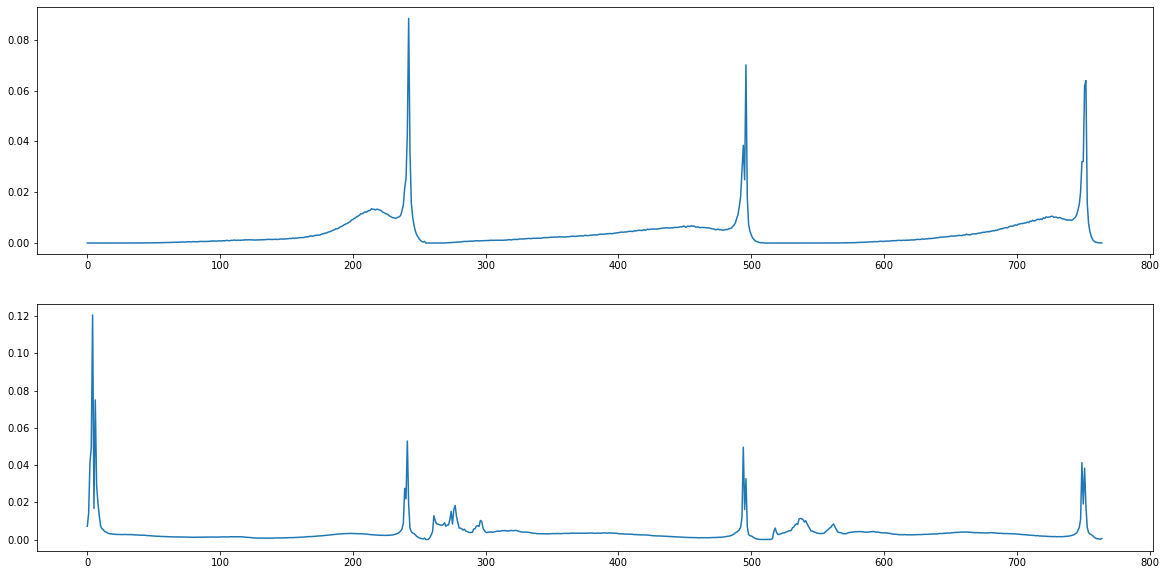

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].plot(tissue_df.mean())
ax[1].plot(pen_df.mean())

### SVM Classifier

In [9]:
from sklearn import svm
import pickle

In [10]:
X = np.array([_img_to_histogram(io.imread(file)) for file in filenames]).reshape([len(filenames), -1])
y = np.concatenate([np.zeros((len(tissue_names),)), np.ones((len(pen_names),))])

model = svm.SVC()

In [11]:
print(X.shape, y.shape)

(625, 765) (625,)


In [12]:
model.fit(X, y)
logits = model.predict(X)
pickle.dump(model, file=open('SVMmodel.pkl', 'wb') )
# s = pickle.load(open('SVMmodel.pkl', 'rb')) # Example of loading model

In [13]:
error = np.abs(y - logits)
print(f"Training Accuracy: {np.sum(1-error)/len(error):0.2%}")

Training Accuracy: 97.28%


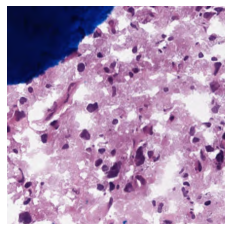

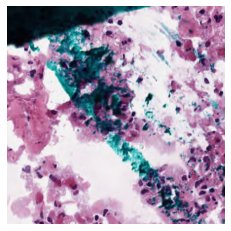

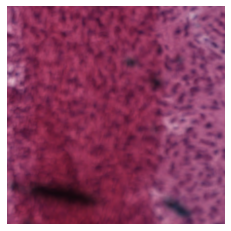

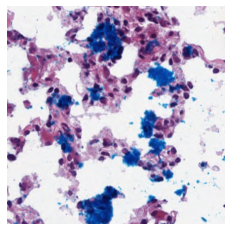

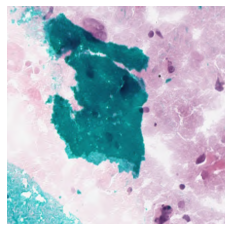

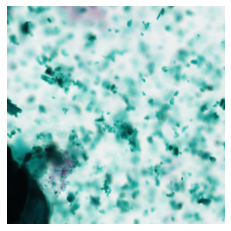

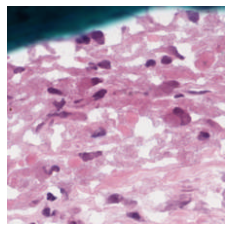

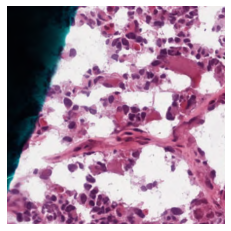

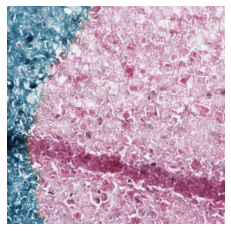

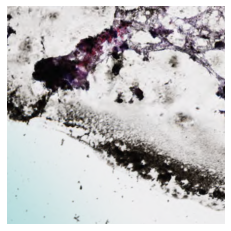

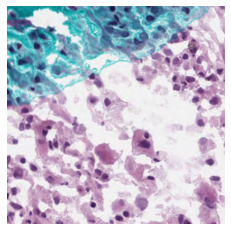

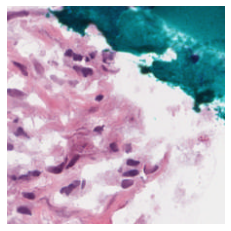

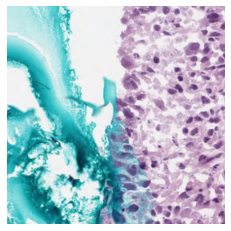

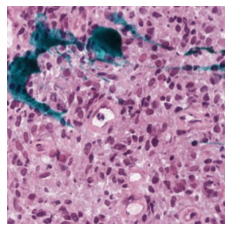

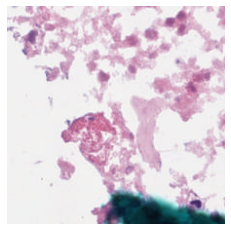

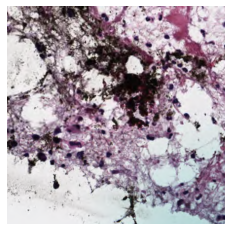

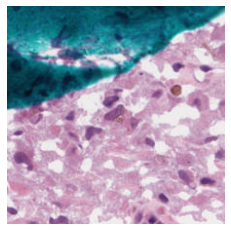

In [14]:
for i, elem in enumerate(error):
    if elem:
        I = io.imread(filenames[i])
        plt.imshow(I)
        plt.axis('off')
        plt.show()
#         print(filenames[i])

In [16]:
logits

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.